### NAMA : Atsna Alsya F 
### NIM : 09011281722035
### KELAS: SK5A


## IMPORT PACKAGES
Berikut ini adalah paket-paket yang digunakan antara lain 

In [1]:
#main library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import numpy as np

from keras.optimizers import Adam
#sklearn library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Dropout
from keras.activations import relu
from sklearn.metrics import confusion_matrix
%matplotlib inline

# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


## IMPORT DATASET

https://www.kaggle.com/neuromusic/avocado-prices

In [2]:
data = pd.read_csv('C:/Users/User/Downloads/avocado.csv')

In [3]:
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


value_counts() fungsi mengembalikan objek yang berisi jumlah nilai unik. Objek yang dihasilkan akan berurutan sehingga elemen pertama adalah elemen yang paling sering terjadi

In [4]:
data.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64


shape menunjunkkan berapa rows dan columns

In [5]:
data.shape

(18249, 14)

Bagi data ke Fitur dan Label

In [6]:
x = data.iloc[:,:13]
y = data.iloc[:,13]

drop menghapus columns 

In [7]:
df = data.drop(columns=["Unnamed: 0","XLarge Bags","year","region"])
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,conventional
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,conventional
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,conventional
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,conventional
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,conventional
...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,organic
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,organic
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,organic
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,organic


In [8]:
enc = LabelEncoder()
df= df.apply(enc.fit_transform)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type
0,51,86,7931,4383,10872,1400,5780,5782,1264,0
1,50,88,7645,3616,10213,1570,6013,5972,1288,0
2,49,46,9388,3891,12864,2516,5616,5625,1328,0
3,48,61,8374,4545,11751,1789,4727,4880,1513,0
4,47,81,7540,4201,10157,1836,4874,4985,1855,0
...,...,...,...,...,...,...,...,...,...,...
18244,161,116,5729,5810,3188,0,6785,6648,2676,1
18245,160,124,5233,4653,4757,0,5955,5864,2340,1
18246,159,140,5203,4654,3928,4712,5985,5961,818,1
18247,158,146,5616,5183,4402,4710,6360,6284,901,1


In [9]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
type            0
dtype: int64

In [10]:
df.shape

(18249, 10)

## FEATURE NORMALIZATION
Normalisasi adalah konsep penting lainnya yang diperlukan untuk mengubah semua fitur ke skala yang sama. Hal ini memungkinkan konvergensi yang lebih cepat pada pembelajaran, dan pengaruh yang lebih seragam untuk semua bobot. Dalam hal ini digunakan MinMaxScaler yang mengubah fitur dengan penskalaan setiap fitur ke rentang yang diberikan (menjadi antara 0 dan 1).

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [13]:
scaler= MinMaxScaler()
feature_scaled=scaler.fit_transform(X)
feature_scaled.shape

(18249, 9)

In [14]:
df.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type
count,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,83.997096,93.595265,9114.688312,8601.745356,8984.864376,4029.833142,8982.184777,8263.606115,6261.255850,0.499918
std,48.787638,40.253995,5265.433348,5232.888735,5258.854866,3996.027809,5253.461654,5168.860788,4852.398211,0.500014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,63.000000,4554.000000,4032.000000,4426.000000,0.000000,4414.000000,3651.000000,1479.000000,0.000000
50%,84.000000,90.000000,9113.000000,8579.000000,8979.000000,2993.000000,8973.000000,8199.000000,5969.000000,0.000000
75%,126.000000,119.000000,13675.000000,13139.000000,13540.000000,7508.000000,13534.000000,12758.000000,10520.000000,1.000000
max,168.000000,258.000000,18236.000000,17701.000000,18102.000000,12070.000000,18096.000000,17320.000000,15081.000000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 10 columns):
Date            18249 non-null int32
AveragePrice    18249 non-null int64
Total Volume    18249 non-null int64
4046            18249 non-null int64
4225            18249 non-null int64
4770            18249 non-null int64
Total Bags      18249 non-null int64
Small Bags      18249 non-null int64
Large Bags      18249 non-null int64
type            18249 non-null int32
dtypes: int32(2), int64(8)
memory usage: 1.3 MB


Text(0.5, 0, 'type')

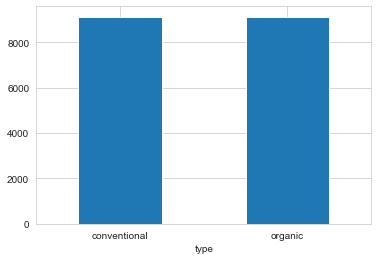

In [17]:
labels = ['conventional','organic']
classes = pd.value_counts(df['type'], sort = True)
classes.plot(kind = 'bar', rot=0)

plt.xticks(range(2), labels)
plt.xlabel("type")


## SEQUENTIAL MODEL
Model Sekuensial adalah tumpukan lapisan linear. Dalam menentukan bentuk masukan, model perlu tahu bentuk masukan apa yang diharapkan. Lapisan pertama dalam model Sequential (dan hanya yang pertama, karena lapisan berikutnya dapat melakukan inferensi bentuk otomatis) perlu menerima informasi tentang bentuk inputnya. Kemudian untuk menambahkan lapisan cukup dengan menambahkan perintah add.

In [18]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=2)

In [33]:
model = Sequential()
model.add(Dense(units= 1000, input_dim =9 , activation='relu'))
model.add(Dense(units= 1000, activation='relu'))
model.add(Dense(units= 1, activation='sigmoid'))

In [34]:
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
acc_training = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, 
                         epochs=100)

Train on 14599 samples, validate on 3650 samples
Epoch 1/100
14599/14599 [==============================] - 15s 1ms/step - loss: 45.7070 - accuracy: 0.8830 - val_loss: 9.0375 - val_accuracy: 0.9142
Epoch 2/100
14599/14599 [==============================] - 15s 1ms/step - loss: 4.6191 - accuracy: 0.9192 - val_loss: 1.0500 - val_accuracy: 0.9485
Epoch 3/100
14599/14599 [==============================] - 15s 1ms/step - loss: 1.7913 - accuracy: 0.9334 - val_loss: 0.4393 - val_accuracy: 0.9649
Epoch 4/100
14599/14599 [==============================] - 15s 997us/step - loss: 0.5811 - accuracy: 0.9564 - val_loss: 0.3053 - val_accuracy: 0.9685
Epoch 5/100
14599/14599 [==============================] - 15s 1ms/step - loss: 0.4728 - accuracy: 0.9562 - val_loss: 0.4326 - val_accuracy: 0.9551
Epoch 6/100
14599/14599 [==============================] - 15s 1ms/step - loss: 0.4373 - accuracy: 0.9547 - val_loss: 0.5884 - val_accuracy: 0.9488
Epoch 7/100
14599/14599 [==============================] - 1

## TESTING


In [36]:
acc_testing  = model.evaluate(x_test, y_test) 
acc_testing

3650/3650 [==============================] - 0s 79us/step


[0.05746834458531601, 0.975616455078125]

## TRAINING AND TESTING ACCURACY

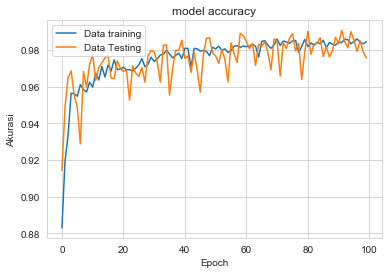

In [37]:
plt.plot(acc_training.history['accuracy'])
plt.plot(acc_training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Data training', 'Data Testing'], loc='upper left')
plt.show()

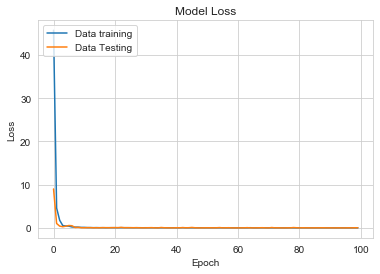

In [38]:
plt.plot(acc_training.history['loss'])
plt.plot(acc_training.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Data training', 'Data Testing'], loc='upper left')
plt.show()

## CONFUSION MATRIX

In [39]:
prediction = model.predict_classes(x_test)
cm = confusion_matrix(y_test, prediction)
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

In [40]:
print ("Confussion matriks:\n",cm)

Confussion matriks:
 [[1751   37]
 [  52 1810]]


## PRECISSION, RECALL, F1, SENSITIVITY, DAN AKURASI


In [41]:
precision = tp / ( tp + fp)
recall = tp/(tp+fn)
f1=(2*precision*recall)/ (precision+recall)
akurasi = (tp+tn)/(tp+tn+fp+fn)
Sensitivity = tp/(tp + fn)

In [42]:
print ("precesion : ",precision)
print("recall : ",recall)
print ("F1 : ",f1)
print("sensitivity : ",Sensitivity )
print("akurasi : ",akurasi)

precesion :  0.9793064876957495
recall :  0.971159179145868
F1 :  0.9752158173210805
sensitivity :  0.971159179145868
akurasi :  0.9756164383561644


Hasil akursai yang di dapat kan sebesar 97.56%